# Visualizing the dataset

After downloading and cleaning the dataset, we move towards exploring it. Through different visualizations, we try to understand if our hypotheses make sense with respect to the data.

In [213]:
# Imports
from collections import Counter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from modular_code.mod_code import manipulate_Y_vs_X_data, plot_top_10_hbar, create_Min_Max_df
import warnings
warnings.filterwarnings("ignore")


# Set figsize for plots
plt.rcParams["figure.figsize"] = (10,6)

In [214]:
# Loading the files required
games_df = pd.read_csv("../data/games_cleaned.csv").drop(['Unnamed: 0'], axis=1).set_index('BGGId')
backup_games_df = games_df.copy() # Backup games_df
themes_df = pd.read_csv("../data/themes.csv").set_index('BGGId')
backup_themes_df = themes_df.copy() # Backup games_df
mechanics_df = pd.read_csv("../data/mechanics.csv").set_index('BGGId')
subcategories_df = pd.read_csv("../data/subcategories.csv")
publisher_df = pd.read_csv("../data/publishers_reduced.csv")

In [215]:
# Basic description of data
games_df.describe()

YearPublished    GameWeight     AvgRating  BayesAvgRating  \
count   21925.000000  21925.000000  21925.000000    21925.000000   
mean     1985.494914      1.982131      6.424922        5.685673   
std       212.486214      0.848983      0.932477        0.365311   
min     -3500.000000      0.000000      1.041330        3.574810   
25%      2001.000000      1.333300      5.836960        5.510300   
50%      2011.000000      1.968800      6.453950        5.546540   
75%      2017.000000      2.525200      7.052450        5.679890   
max      2021.000000      5.000000      9.914290        8.514880   

             StdDev    MinPlayers    MaxPlayers     ComAgeRec       NumOwned  \
count  21925.000000  21925.000000  21925.000000  21925.000000   21925.000000   
mean       1.516374      2.007343      5.707868     12.021072    1467.848164   
std        0.285578      0.693093     15.014643      4.477699    5294.120574   
min        0.196023      0.000000      0.000000      2.000000       0.000000   
25%        1.320720      2.000000      4.000000      8.000000     150.000000   
50%        1.476880      2.000000      4.000000     11.666667     320.000000   
75%        1.665470      2.000000      6.000000     18.000000     899.000000   
max        4.277280     10.000000    999.000000     21.000000  166497.000000   

            NumWant  ...  Rank:partygames  Rank:childrensgames  Cat:Thematic  \
count  21925.000000  ...     21925.000000         21925.000000  21925.000000   
mean      41.690946  ...     21295.352201         21062.680274      0.055827   
std      117.255229  ...      3637.139987          4219.776597      0.229592   
min        0.000000  ...         1.000000             1.000000      0.000000   
25%        3.000000  ...     21926.000000         21926.000000      0.000000   
50%        9.000000  ...     21926.000000         21926.000000      0.000000   
75%       28.000000  ...     21926.000000         21926.000000      0.000000   
max     2031.000000  ...     21926.000000         21926.000000      1.000000   

       Cat:Strategy       Cat:War    Cat:Family       Cat:CGS  Cat:Abstract  \
count   21925.00000  21925.000000  21925.000000  21925.000000  21925.000000   
mean        0.10577      0.161003      0.105633      0.013820      0.050855   
std         0.30755      0.367542      0.307374      0.116745      0.219707   
min         0.00000      0.000000      0.000000      0.000000      0.000000   
25%         0.00000      0.000000      0.000000      0.000000      0.000000   
50%         0.00000      0.000000      0.000000      0.000000      0.000000   
75%         0.00000      0.000000      0.000000      0.000000      0.000000   
max         1.00000      1.000000      1.000000      1.000000      1.000000   

          Cat:Party  Cat:Childrens  
count  21925.000000   21925.000000  
mean       0.029190       0.040182  
std        0.168344       0.196391  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max        1.000000       1.000000  

[8 rows x 40 columns]

## Set 1: Games Published per Year

We are interested in the trend of in supposed trend of increased demand in board games. To find this trend we filter data to after 1950 since Board Game Geek has data going into the B.C.s

In [216]:
#Sum games per year
games_per_year = pd.DataFrame(games_df['YearPublished'].value_counts()) # data from of yearpublish vs count
games_per_year = games_per_year.reset_index() # adds index
games_per_year = games_per_year.rename(columns={"index": "Year", "YearPublished": "Count"}) # renames columsn
games_per_year = games_per_year.sort_values(by=['Year']) # sort by year
#filter after 1950
after_year_mask = games_per_year["Year"] >= 1950
gpy_after_year = games_per_year[after_year_mask]

In [217]:
#filter after 1950
after_year_mask = games_per_year["Year"] >= 1950
gpy_after_year = games_per_year[after_year_mask]

In [218]:
fig = px.bar(gpy_after_year, x="Year", y="Count",
                 labels={
                     "Year": "Year of Publication",
                     "Count": "Number of Games Published",
                 },
                title="Published Games per Year")

fig.show()

## Set 2: Game Weight

Board game Geek has a rating system of for game complexity. This system ranks games as from 1 to 5. This is a possible key indicator to wether a board is well recieve and and sells well. First we sum the amount of games in each range to determine if there is an opening in the market. Then we compared complexity to attributes that tied to increased ownership. these include user rating, ownership and number of people who want it. 

In [219]:
#remove zeros (BGG has rating 1-5)
df_no_zeros_mask = games_df["GameWeight"] >= 1
df_without_zeros = games_df[df_no_zeros_mask]

In [220]:
fig = px.histogram(df_without_zeros, x="GameWeight",
                 labels={
                     "GameWeight": "BGG Game Weight",
                 },
                title="Number of Games at Each Weight").update_layout(yaxis_title="Number of Games")

fig.show()

In [221]:
fig = px.scatter(df_without_zeros, x="AvgRating", y="GameWeight",
                 labels={
                    "AvgRating": "Averege User Rating",
                    "GameWeight": "BGG Game Weight",
                 },
                title="Game Weight vs Average User Rating")

fig.show()

In [222]:
after_year_mask = df_without_zeros["YearPublished"] >= 1992
games_after_year = df_without_zeros[after_year_mask]
games_after_year = games_after_year.sort_values(by=['YearPublished'])

In [223]:
fig = px.scatter(games_after_year, x="AvgRating", y="GameWeight", animation_frame="YearPublished", animation_group="AvgRating", size="NumOwned", color="NumWant", hover_name="Name",
                labels={
                    "AvgRating": "Averege User Rating",
                    "GameWeight": "BGG Game Weight",
                 },
                title="Game Weight vs Average User Rating (Size: Number Owned, Color: Number Wanted)")
fig.show()

Based on majority of games being in the lower complexity, trends show that a more complex game will have higher rating and owenership. 

### Set 4: Minimum and Maximum Numbers of Players
The optimal minimum and maximum numbers of players for a board game are two of the most important board game design features. Some categories of the board game are more suitable for team players, and some others might be more exciting to play individually. The dataset will be visualized with boxplots to determine the minimum, first quartile, median, third quartile, and maximum players for each board game category minimum and maximum numbers of players.

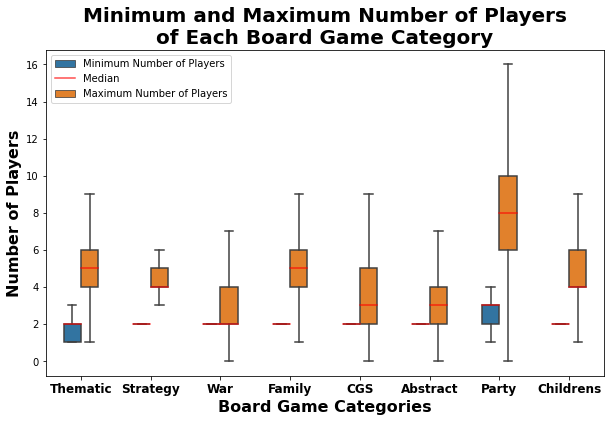

In [224]:
# Create a dataframe that consists of Board Game Category Name, Minimum Number of Players, and Maximum Number of Players for each Board Game Category
min_max_thematic_df = create_Min_Max_df(games_df, "Cat:Thematic", "Thematic")
games_df = backup_games_df.copy()
min_max_strategy_df = create_Min_Max_df(games_df, "Cat:Strategy", "Strategy")
games_df = backup_games_df.copy()
min_max_war_df = create_Min_Max_df(games_df, "Cat:War", "War")
games_df = backup_games_df.copy()
min_max_family_df = create_Min_Max_df(games_df, "Cat:Family", "Family")
games_df = backup_games_df.copy()
min_max_cgs_df = create_Min_Max_df(games_df, "Cat:CGS", "CGS")
games_df = backup_games_df.copy()
min_max_abstract_df = create_Min_Max_df(games_df, "Cat:Abstract", "Abstract")
games_df = backup_games_df.copy()
min_max_party_df = create_Min_Max_df(games_df, "Cat:Party", "Party")
games_df = backup_games_df.copy()
min_max_childrens_df = create_Min_Max_df(games_df, "Cat:Childrens", "Childrens")
games_df = backup_games_df.copy()

# Concatenate the dataframe
cdf = pd.concat([min_max_thematic_df, min_max_strategy_df, min_max_war_df, min_max_family_df, min_max_cgs_df, min_max_abstract_df, min_max_party_df, min_max_childrens_df])
# Melt the dataframe
mdf = pd.melt(cdf, id_vars=['Cat'], var_name=['Minimum_or_Maximum_Number_of_Players']) 

# Plot the Boxplot
ax = sns.boxplot(x="Cat", y="value", hue="Minimum_or_Maximum_Number_of_Players", data=mdf, showfliers=False, width = 0.5, 
                    palette="tab10", medianprops=dict(color="red", alpha=0.7))  # RUN PLOT   
ax.set_ylabel("Number of Players", fontsize=16, fontweight='bold')
ax.set_xlabel("Board Game Categories", fontsize=16, fontweight='bold')
ax.set_xticklabels(['Thematic', 'Strategy', 'War', 'Family', 'CGS', 'Abstract', 'Party', 'Childrens'], fontweight='bold', fontsize=12)
ax.legend(['Minimum Number of Players', '_nolegend_','_nolegend_','_nolegend_','_nolegend_','_nolegend_','Median','Maximum Number of Players'])
plt.title("Minimum and Maximum Number of Players\nof Each Board Game Category", fontweight='bold', fontsize=20)
plt.show()


## Set 5: Understanding the recommended ages

We are mainly interested in understanding the effect of recommended ages with popularity. The columns 'ComAgeRec' and 'MfgAgeRec' show the community and manufacturer recommendations.

In [225]:
games_df.columns

Index(['Name', 'Description', 'YearPublished', 'GameWeight', 'AvgRating',
       'BayesAvgRating', 'StdDev', 'MinPlayers', 'MaxPlayers', 'ComAgeRec',
       'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime',
       'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings',
       'NumComments', 'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Kickstarted', 'Rank:boardgame',
       'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames',
       'Rank:thematic', 'Rank:cgs', 'Rank:wargames', 'Rank:partygames',
       'Rank:childrensgames', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens'],
      dtype='object')

### Manufacturer and Community Ages

We study the ages and the number of games designed for each range of ages. Since community ages are means and thus non inegral, for the sake of this analysis we convert them to the lower integer

In [226]:
games_df['ComAgeRec2'] = games_df['ComAgeRec'].astype('int')

popularity_metrics = ['NumWant','NumWish','NumWeightVotes']
# 'ComMaxPlaytime', 'ComMinPlaytime'

<AxesSubplot:title={'center':'Mfg Age vs Rating'}, xlabel='Age', ylabel='Rating'>

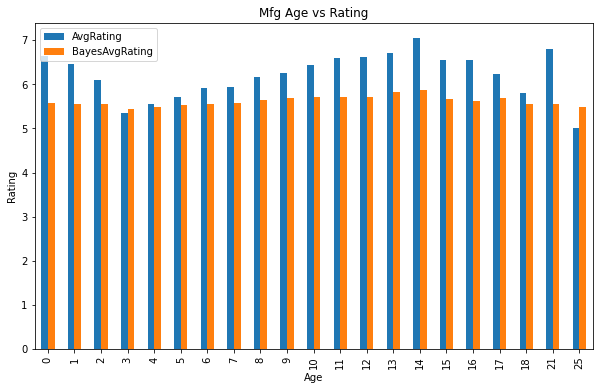

In [227]:
df = games_df.groupby('MfgAgeRec').mean()
df[['AvgRating','BayesAvgRating']].plot.bar(xlabel='Age',
                                           ylabel='Rating',
                                           title='Mfg Age vs Rating')

<AxesSubplot:title={'center':'Com Age vs Rating'}, xlabel='Age', ylabel='Rating'>

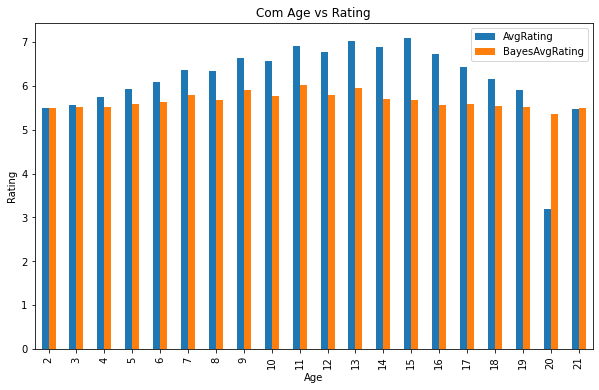

In [228]:
df = games_df.groupby('ComAgeRec2').mean()
df[['AvgRating','BayesAvgRating']].plot.bar(xlabel='Age',
                                           ylabel='Rating',
                                           title='Com Age vs Rating')

<AxesSubplot:title={'center':'Com Age vs Rating'}, xlabel='Age', ylabel='Rating'>

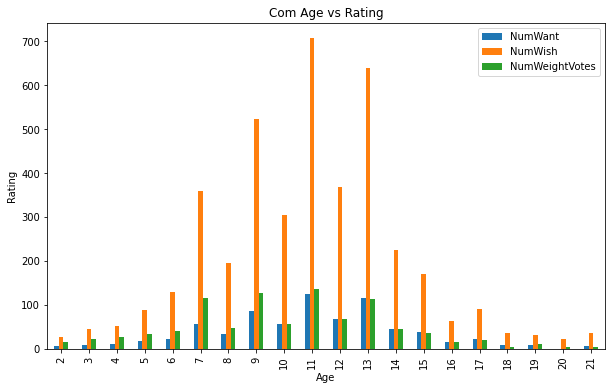

In [229]:
df = games_df.groupby('ComAgeRec2').mean()
df[popularity_metrics].plot.bar(xlabel='Age',
    ylabel='Rating',title='Com Age vs Rating')

<AxesSubplot:title={'center':'Mfg Age vs Rating'}, xlabel='Age', ylabel='Rating'>

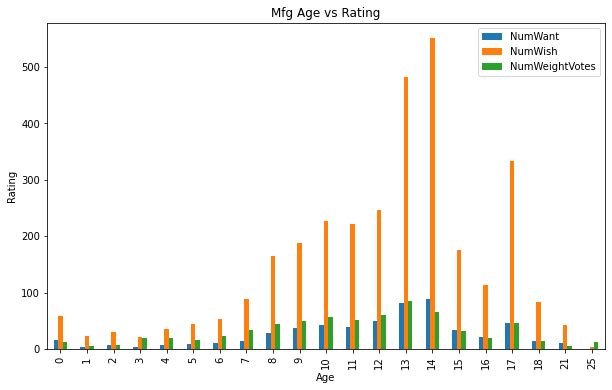

In [230]:
df = games_df.groupby('MfgAgeRec').mean()
df[popularity_metrics].plot.bar(xlabel='Age',
    ylabel='Rating',title='Mfg Age vs Rating')

### Difference in Community and Manufacturer's recommendations

On finding the difference between the recommended ages, we can get an understanding of how far from the intended community did the game end up being used.

In [231]:
games_df['ComMfgChange'] = games_df['ComAgeRec'] - games_df['MfgAgeRec']
games_df.ComMfgChange.describe()

count    21925.000000
mean         2.407662
std          5.103704
min        -12.000000
25%         -1.000000
50%          0.400000
75%          6.000000
max         21.000000
Name: ComMfgChange, dtype: float64

While not advisable (safety issues), the community age being lower than the recommended age means that the game is easy to operate and of interest to a wider range of the population. There are 7500+ such games.

<AxesSubplot:title={'center':'Category wise games with wider community reach than expected'}, xlabel='Category', ylabel='Number of games'>

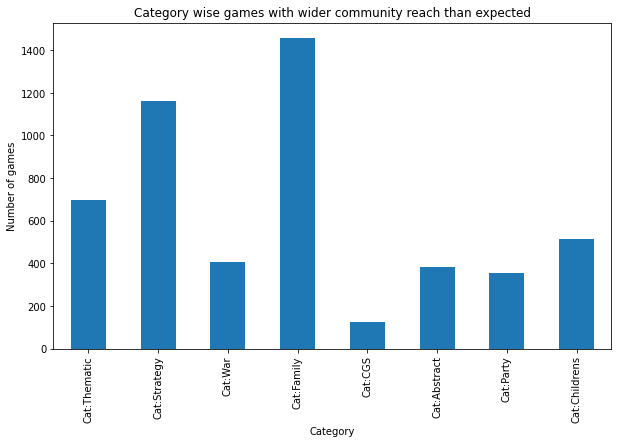

In [232]:
idx = games_df.ComMfgChange[games_df.ComMfgChange < 0].index
games_df.loc[idx, ['Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens']].sum().plot.bar(
    title='Category wise games with wider community reach than expected',
    xlabel='Category',
    ylabel='Number of games')

### Set 6: Popularity of Different Board Game Categories

Analyzing and studying the popularity of different board game categories is crucial for board game developers publishers, and manufacturers. With the data visualization, the board game industry would be able to know which board game categories they should put more effort in the game development to maximize their profits. Besides that, the board game industry can continue to get more feedback from the users to improve the overall board game designs that have low popularity.

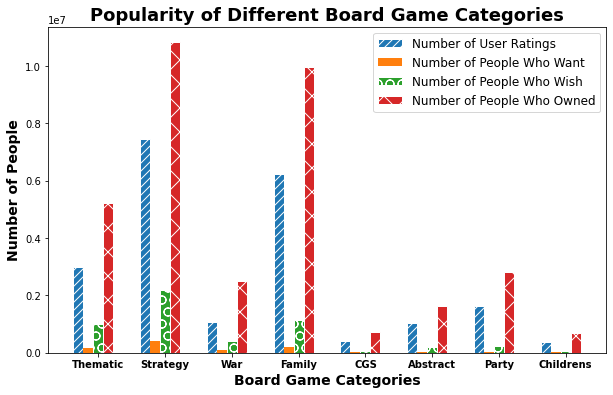

In [233]:
# Get the popularity data including NumUserRatings, NumWant, NumWish, NumOwned, NumComments
# NumUserRatings - Number of People Rated the Board Game
# NumWant        - Number of People Wanted the Board Game
# NumWish        - Number of People Wish to have the Board Game
# NumOwned       - Number of People Owned the Board Game
popularity_data = games_df[['NumUserRatings', 'NumWant', 'NumWish', 'NumOwned']].to_numpy()
# Get BGGidx 
BGGid = games_df.index[:].tolist()
# Convert the popularity array to dataframe
popularity_data_df = pd.DataFrame(popularity_data, index = BGGid, columns = ['NumUserRatings', 'NumWant', 'NumWish', 'NumOwned'])

# Board Game Categories
board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CGS', 'Abstract', 'Party', 'Childrens']

# Initialize an array that stores counts of Row = Popularity Features, Column = Board Game Categories
board_game_Pop_vs_Catg = np.zeros((popularity_data.shape[1], len(board_game_categories)))

# Get the popularity counts based on board game category
board_game_Pop_vs_Catg = manipulate_Y_vs_X_data(games_df, board_game_Pop_vs_Catg, popularity_data_df)

# Plot multiple bar graphs
X_axis = np.arange(len(board_game_categories))
  
plt.bar(X_axis - 0.3, board_game_Pop_vs_Catg[0, :].tolist(), 0.15, label = 'Number of User Ratings', hatch = "///", edgecolor = 'white')
plt.bar(X_axis - 0.15, board_game_Pop_vs_Catg[1, :].tolist(), 0.15, label = 'Number of People Who Want')
plt.bar(X_axis, board_game_Pop_vs_Catg[2, :].tolist(), 0.15, label = 'Number of People Who Wish', hatch = "O", edgecolor = 'white')
plt.bar(X_axis + 0.15, board_game_Pop_vs_Catg[3, :].tolist(), 0.15, label = 'Number of People Who Owned', hatch = "x", edgecolor = 'white')
  
plt.xticks(X_axis, board_game_categories, fontsize=10, fontweight = 'bold')
plt.xlabel("Board Game Categories", fontsize = 14, fontweight = 'bold')
plt.ylabel("Number of People", fontsize = 14, fontweight = 'bold')
plt.title("Popularity of Different Board Game Categories", fontsize=18, fontweight = 'bold')
plt.legend(prop={'size': 12})
plt.show()

# Set 7 Reimplementation

Text(0.5, 0, 'Number of Expansions')

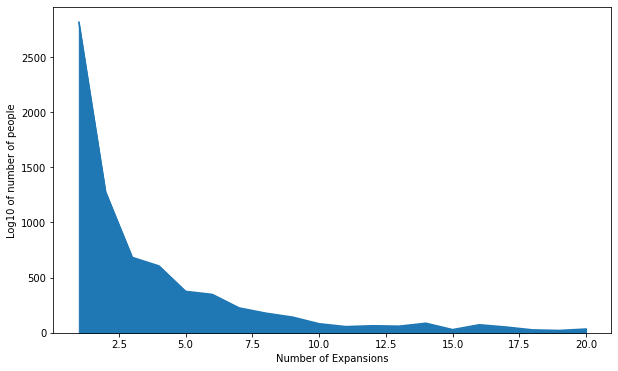

In [234]:
games_df['NumOwned_log'] = np.log10(games_df['NumOwned'], where=games_df['NumOwned'] > 0)
games_df['NumWant_log'] = np.log10(games_df['NumWant'], where=games_df['NumWant'] > 0)
games_df['NumWish_log'] = np.log10(games_df['NumWish'], where=games_df['NumWish'] > 0)

df = games_df[['NumExpansions','NumAlternates','NumOwned_log','NumImplementations']]
df = df.drop(df.index[df['NumExpansions'] <1])
df = df.drop(df.index[df['NumExpansions'] >20])
df = df.drop(df.index[df['NumAlternates'] <1])
df = df.drop(df.index[df['NumAlternates'] >20])
df = df.drop(df.index[df['NumImplementations'] >10])
df2 = df.groupby('NumExpansions')['NumOwned_log'].sum()
ax = df2.plot.area()
ax.set_ylabel("Log10 of number of people")
ax.set_xlabel("Number of Expansions")

Text(0.5, 0, 'Number of Implementations')

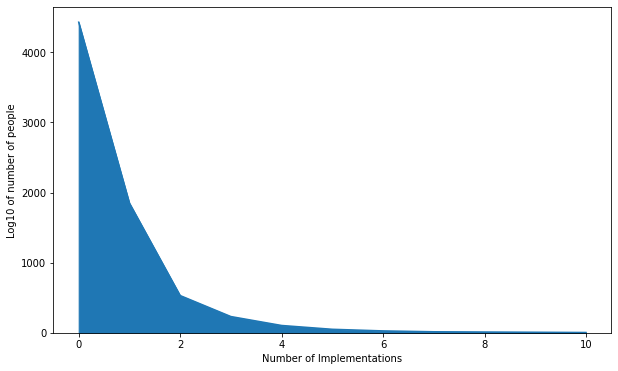

In [235]:
df1 = df.groupby('NumImplementations')['NumOwned_log'].sum()
ax = df1.plot.area()
ax.set_ylabel("Log10 of number of people")
ax.set_xlabel("Number of Implementations")

Text(0.5, 0, 'Number of Alternates')

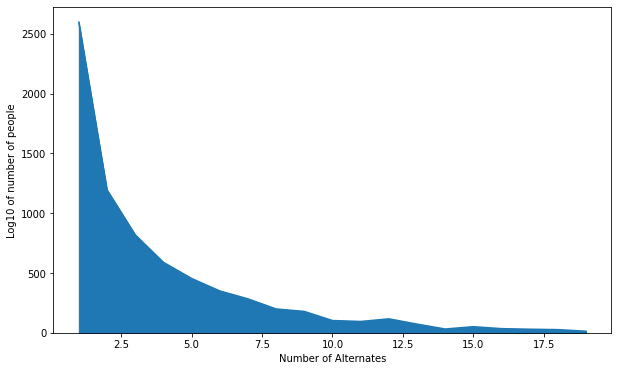

In [236]:
df3 = df.groupby('NumAlternates')['NumOwned_log'].sum()
ax = df3.plot.area()
ax.set_ylabel("Log10 of number of people")
ax.set_xlabel("Number of Alternates")

## Set 8: Play time

We are mainly interested in understanding the effect of play time of a game with its popularity. The column 'MfgPlaytime' show the play time as per the manufacturer recommendations. The columns 'ComMinPlaytime' and 'ComMaxPlaytime'show the minimum and maximun play time of the game as per the community



Text(0.5, 1, 'Log2 of Manufacturer reccomended Play time')

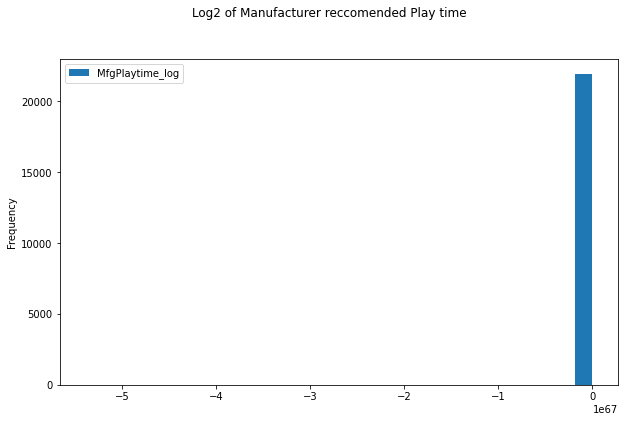

In [237]:
games_df['MfgPlaytime_log'] = np.log2(games_df['MfgPlaytime'], where=games_df['MfgPlaytime'] > 0)
df = games_df[['MfgPlaytime_log']]
fig = df.plot.hist(bins=30)
plt.suptitle('Log2 of Manufacturer reccomended Play time', x=0.5, y=1, ha='center')

Text(0.5, 0, 'log2 of Manufacturer reccomended play time')

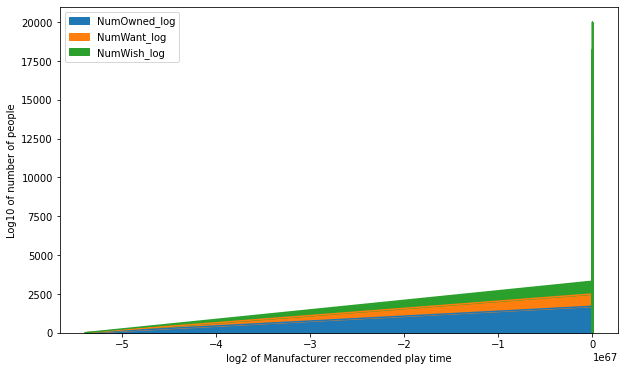

In [238]:
df = games_df[['MfgPlaytime_log','NumOwned_log','NumWant_log','NumWish_log']]
df = df.drop(df.index[df['MfgPlaytime_log'] >10])
df = df.groupby('MfgPlaytime_log')['NumOwned_log','NumWant_log','NumWish_log'].sum()
ax = df.plot.area()
ax.set_ylabel("Log10 of number of people")
ax.set_xlabel("log2 of Manufacturer reccomended play time")

### Difference in the Community Average play times and the manufacturer reccomended play time

MfgPlaytime' show the play time as per the manufacturer recommendations. The columns 'ComMinPlaytime' and 'ComMaxPlaytime'show the minimum and maximun play time of the game as per the community


<AxesSubplot:ylabel='Frequency'>

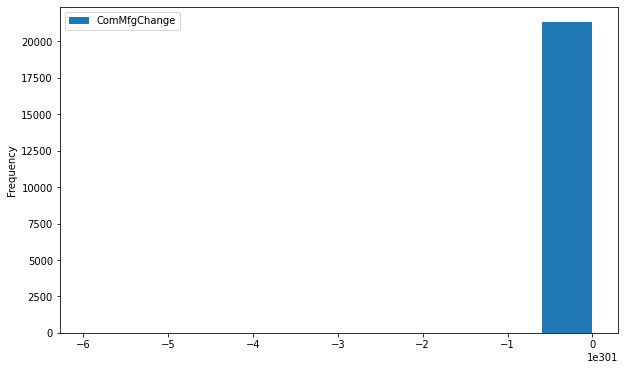

In [239]:
k = games_df['MfgPlaytime']- ((games_df['ComMinPlaytime'] + games_df['ComMaxPlaytime'])/2)
games_df['ComMfgChange'] =  np.log2(k, where=k > 0)
df = games_df[['ComMfgChange']]
df = df.drop(df.index[df['ComMfgChange'] >200])

df.plot.hist()

## Set 9: Effect of Kickstart

As a new manufacturer, it is also interesting to see what effect Kickstarter campaigns have had. For example, we presumed that,
1. Kickstarter programs generate a buzz even before the games has been developed at no expenses
2. Certain categories have a higher change of getting on Kickstarter than others

### Category wise successful Kickstarted games

<AxesSubplot:title={'center':'Category wise Kickstarted Games'}, xlabel='Categories', ylabel='Counts'>

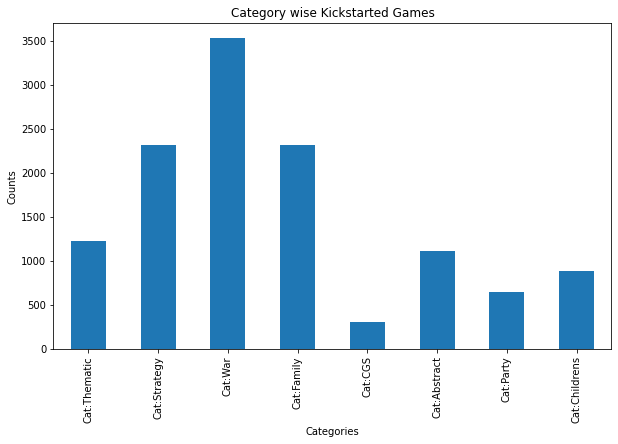

In [240]:
df = games_df.set_index(['Kickstarted'])[['Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens']]
df.sum().plot.bar(xlabel='Categories', ylabel='Counts', title='Category wise Kickstarted Games')

In [241]:
df = df.groupby(df.index).sum().T

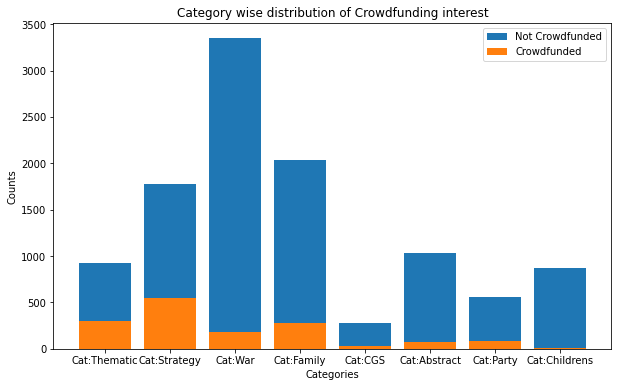

In [242]:
plt.bar(df.index.tolist(), df[0])
plt.bar(df.index.tolist(), df[1])
plt.legend(['Not Crowdfunded','Crowdfunded'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category wise distribution of Crowdfunding interest')

del df

### Theme wise successful Kickstarted games

There are nearly 200+ themes and most of them barely have any crowdfunding. Thus we consider only the effect of those themes where the number of games crowdfunded is over 100

<AxesSubplot:title={'center':'Kickstarted games by Theme'}, xlabel='Theme', ylabel='Counts'>

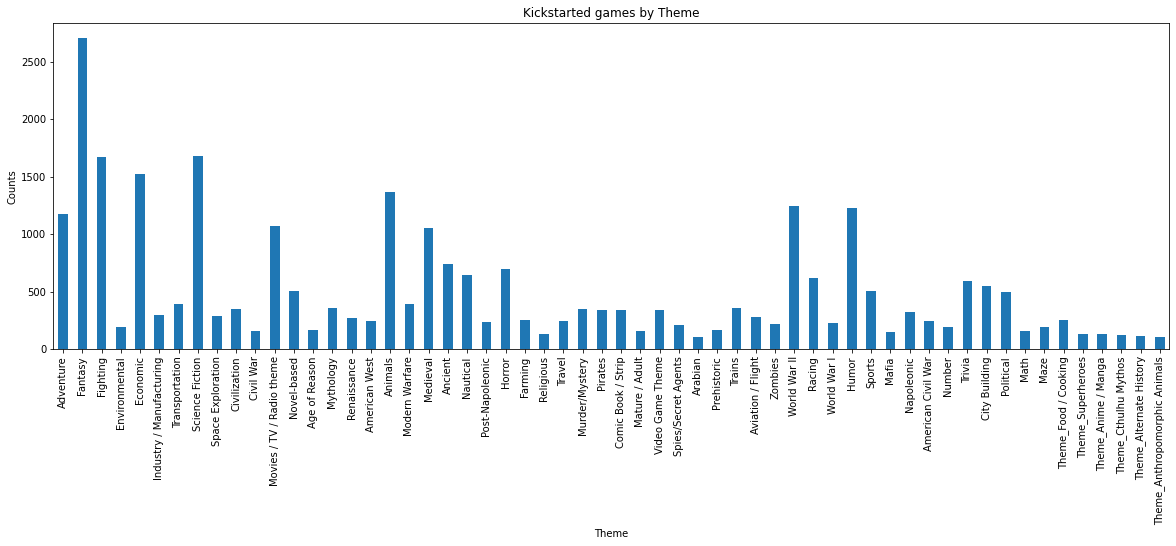

In [243]:
df = themes_df
df['Kickstarted'] = games_df['Kickstarted']
df2 = df.set_index(['Kickstarted']).sum()
df2[df2>100].plot.bar(xlabel='Theme', ylabel='Counts',
            title='Kickstarted games by Theme',
            figsize=(20,6))

### Set 13: Top 10 Board Game Themes for Different Board Game Categories
Visualizing top 10 board game themes for different board game categories for the game developers to understand which board game themes are the most common for different board game categories. With the user rating data and board game themes data, board game developers can determine which board games themes designs are considered a success and which are not. Including the right board game design themes are crucial to capture the interests of board game lovers and increase player engagement towards the board game.

In [244]:
# Get the original data
themes_df = backup_themes_df.copy()

# Get Board Game Themes list
board_game_themes = themes_df.columns.values.tolist()

# Initialize an array that stores counts of Row = Board Game Themes, Column = Board Game Categories
board_game_Theme_vs_Catg = np.zeros((len(themes_df.columns), len(board_game_categories)))

# Get the Themes counts based on board game category
board_game_Theme_vs_Catg = manipulate_Y_vs_X_data(games_df, board_game_Theme_vs_Catg, themes_df)

# Convert the board_game_Theme_vs_Catg array to dataframe
board_game_Theme_vs_Catg_df = pd.DataFrame(board_game_Theme_vs_Catg, index = board_game_themes, columns = board_game_categories)
board_game_Theme_vs_Catg_df.head(10)

Thematic  Strategy    War  Family    CGS  Abstract  \
Adventure                    332.0      90.0   42.0   112.0   24.0       7.0   
Fantasy                      384.0     381.0  184.0   263.0  138.0      37.0   
Fighting                     352.0     233.0  140.0    82.0  119.0      21.0   
Environmental                  7.0      52.0    2.0    33.0    1.0       6.0   
Medical                        6.0      16.0    0.0    12.0    0.0       0.0   
Economic                      52.0     625.0   68.0   146.0    4.0       8.0   
Industry / Manufacturing      13.0     152.0    4.0    20.0    3.0       4.0   
Transportation                17.0     166.0    5.0    61.0    0.0       6.0   
Science Fiction              297.0     280.0  341.0    97.0   66.0      13.0   
Space Exploration             43.0      88.0   19.0    18.0    5.0       2.0   

                          Party  Childrens  
Adventure                   7.0       36.0  
Fantasy                    44.0       77.0  
Fighting                   34.0       14.0  
Environmental               0.0        5.0  
Medical                     6.0        3.0  
Economic                    7.0       24.0  
Industry / Manufacturing    0.0        0.0  
Transportation              0.0       10.0  
Science Fiction            17.0       14.0  
Space Exploration           1.0        4.0

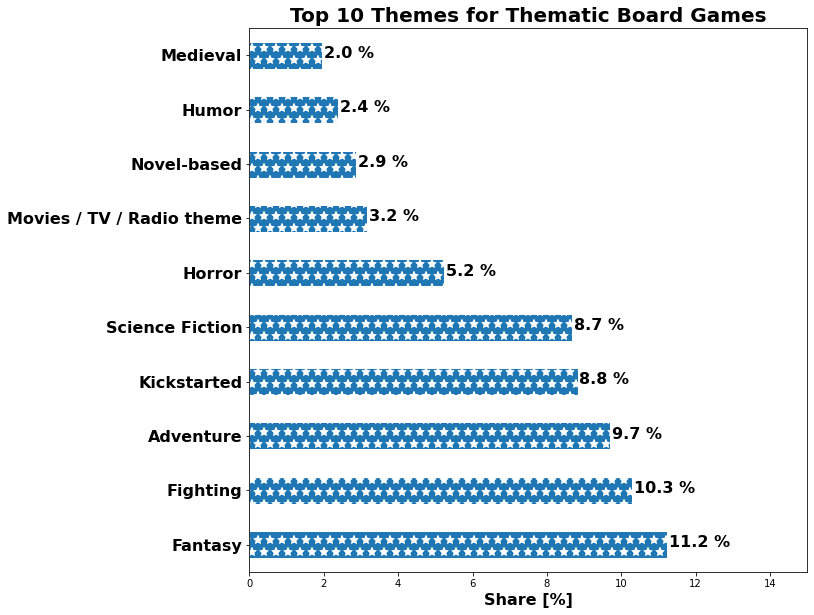

In [245]:
# Plot top 10 themes for thematic board game category
plot_top_10_hbar(board_game_Theme_vs_Catg_df, 'Themes' ,'Thematic')
sorted_thematic_df = board_game_Theme_vs_Catg_df.nlargest(10, 'Thematic')

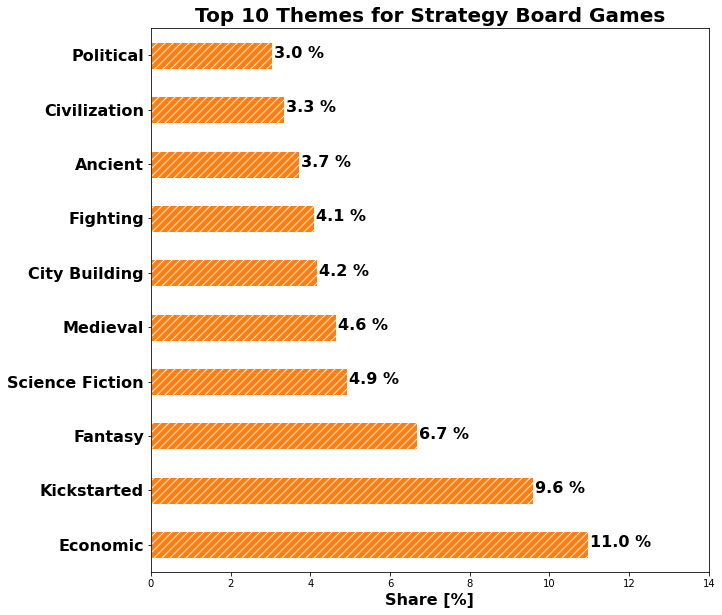

In [246]:
# Top 10 themes for strategy board game category
plot_top_10_hbar(board_game_Theme_vs_Catg_df, 'Themes', 'Strategy', plt_hatch = "///", plt_color = '#ff7f0e')
sorted_strategy_df = board_game_Theme_vs_Catg_df.nlargest(10, 'Strategy')

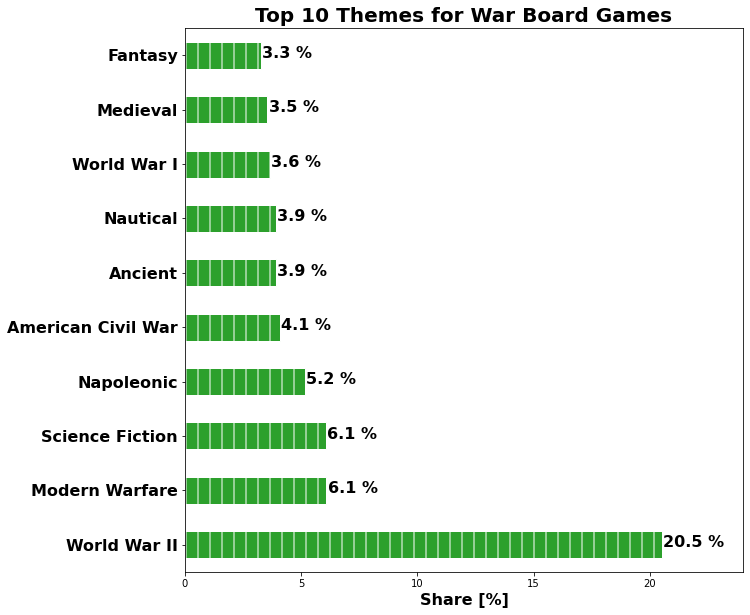

In [247]:
# Top 10 themes for war board game category
plot_top_10_hbar(board_game_Theme_vs_Catg_df, 'Themes', 'War', plt_hatch = "|", plt_color = '#2ca02c')
sorted_war_df = board_game_Theme_vs_Catg_df.nlargest(10, 'War')

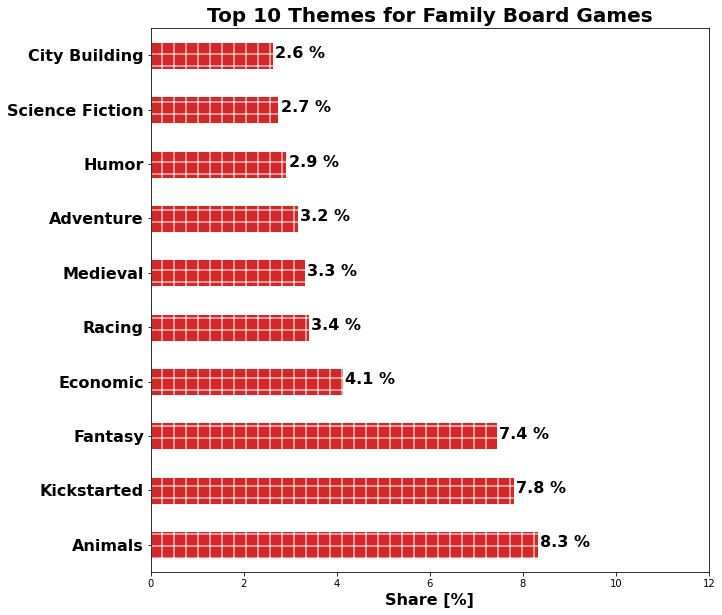

In [248]:
# Top 10 themes for family board game category
plot_top_10_hbar(board_game_Theme_vs_Catg_df, 'Themes', 'Family', plt_hatch = "+", plt_color = '#d62728')
sorted_family_df = board_game_Theme_vs_Catg_df.nlargest(10, 'Family')

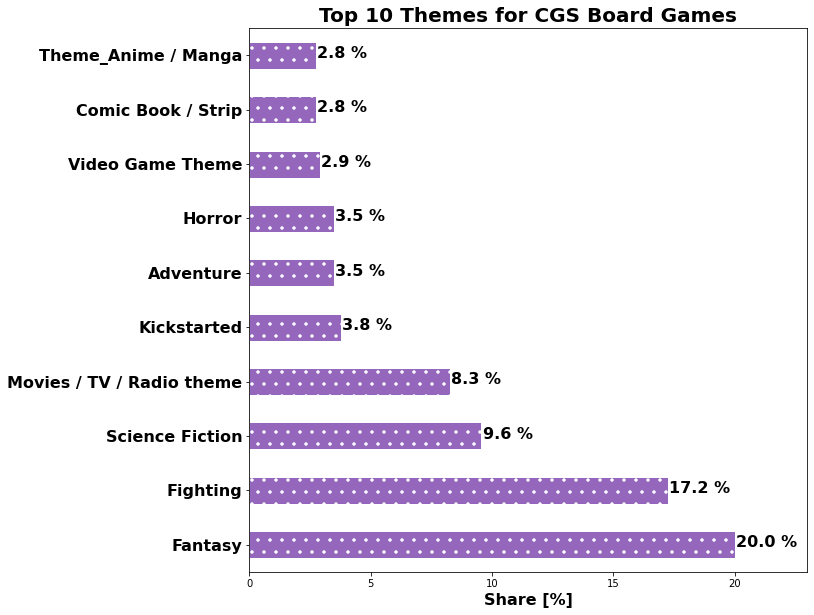

In [249]:
# Top 10 themes for CSG board game category
plot_top_10_hbar(board_game_Theme_vs_Catg_df, 'Themes', 'CGS', plt_hatch = ".", plt_color = '#9467bd')
sorted_cgs_df = board_game_Theme_vs_Catg_df.nlargest(10, 'CGS')

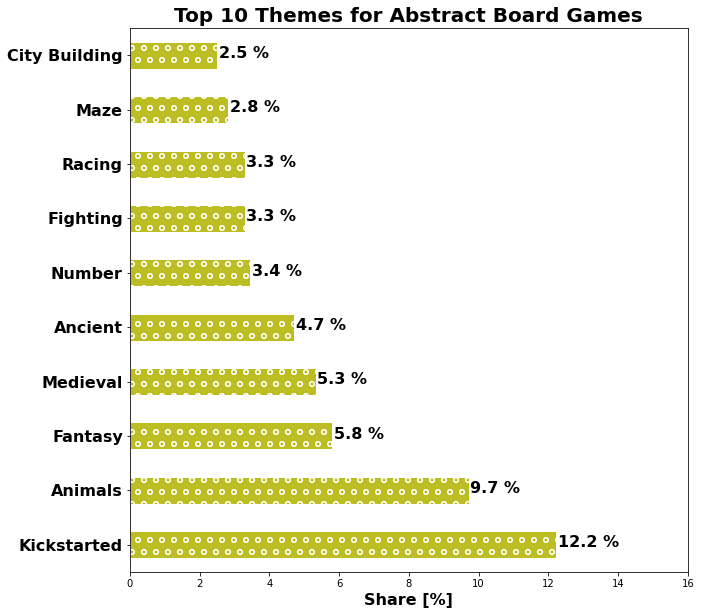

In [250]:
# Top 10 themes for Abstract board game category
plot_top_10_hbar(board_game_Theme_vs_Catg_df, 'Themes', 'Abstract', plt_hatch = "o", plt_color = '#bcbd22')
sorted_abstract_df = board_game_Theme_vs_Catg_df.nlargest(10, 'Abstract')

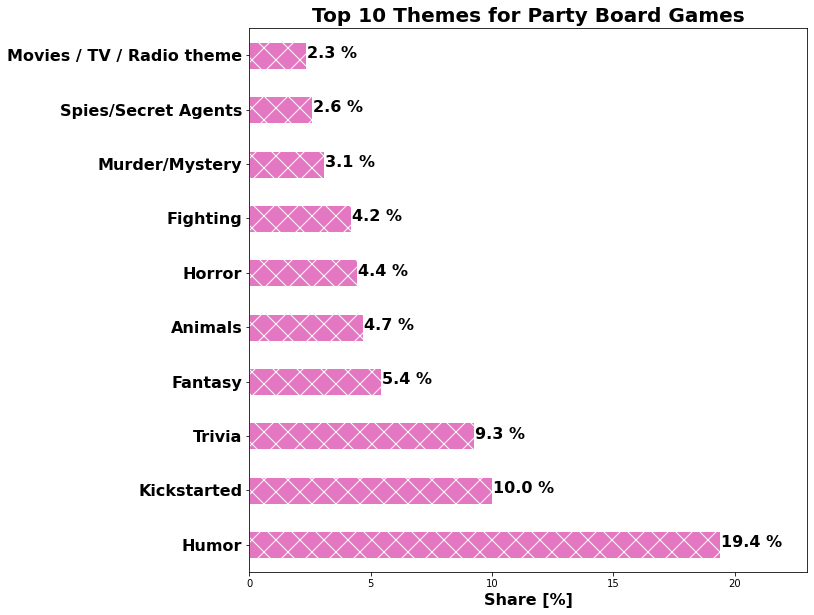

In [251]:
# Top 10 themes for Party board game category
plot_top_10_hbar(board_game_Theme_vs_Catg_df, 'Themes', 'Party', plt_hatch = "x", plt_color = '#e377c2')
sorted_party_df = board_game_Theme_vs_Catg_df.nlargest(10, 'Party')

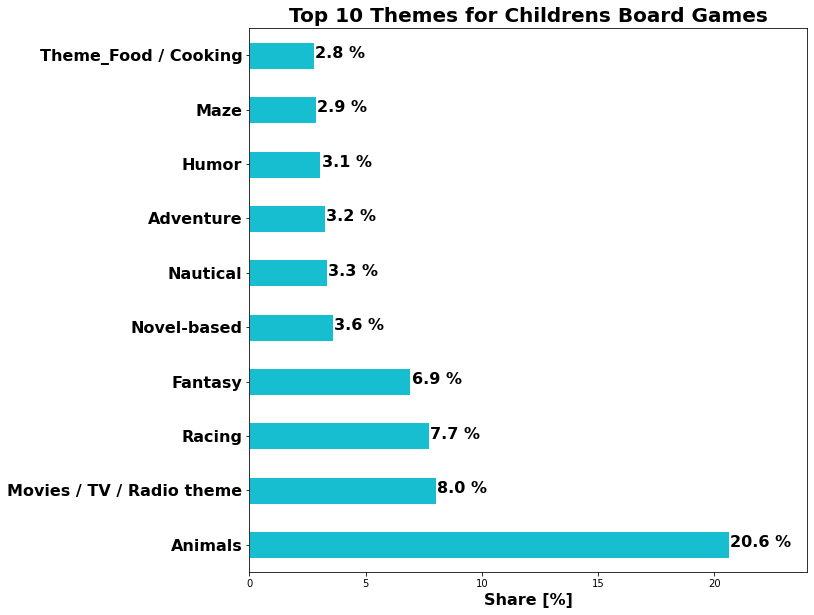

In [252]:
# Top 10 themes for Childrens board game category
plot_top_10_hbar(board_game_Theme_vs_Catg_df, 'Themes', 'Childrens', plt_hatch = "", plt_color = '#17becf')
sorted_childrens_df = board_game_Theme_vs_Catg_df.nlargest(10, 'Childrens')

In [253]:
# Get the top 10 list and convert to list for each board game category
sorted_thematic_list = sorted_thematic_df.index[:10].tolist()
sorted_strategy_list = sorted_strategy_df.index[:10].tolist()
sorted_war_list = sorted_war_df.index[:10].tolist()
sorted_family_list = sorted_family_df.index[:10].tolist()
sorted_cgs_list = sorted_cgs_df.index[:10].tolist()
sorted_abstract_list = sorted_abstract_df.index[:10].tolist()
sorted_party_list = sorted_party_df.index[:10].tolist()
sorted_childrens_list = sorted_childrens_df.index[:10].tolist()

# Append to the theme list
theme_list = []
theme_list.extend(sorted_thematic_list)
theme_list.extend(sorted_strategy_list)
theme_list.extend(sorted_war_list)
theme_list.extend(sorted_family_list)
theme_list.extend(sorted_cgs_list)
theme_list.extend(sorted_abstract_list)
theme_list.extend(sorted_party_list)
theme_list.extend(sorted_childrens_list)

# Display which themes appear the most
print(Counter(theme_list))

Counter({'Fantasy': 8, 'Kickstarted': 6, 'Fighting': 5, 'Science Fiction': 5, 'Medieval': 5, 'Adventure': 4, 'Movies / TV / Radio theme': 4, 'Humor': 4, 'Animals': 4, 'Horror': 3, 'City Building': 3, 'Ancient': 3, 'Racing': 3, 'Novel-based': 2, 'Economic': 2, 'Nautical': 2, 'Maze': 2, 'Civilization': 1, 'Political': 1, 'World War II': 1, 'Modern Warfare': 1, 'Napoleonic': 1, 'American Civil War': 1, 'World War I': 1, 'Video Game Theme': 1, 'Comic Book / Strip': 1, 'Theme_Anime / Manga': 1, 'Number': 1, 'Trivia': 1, 'Murder/Mystery': 1, 'Spies/Secret Agents': 1, 'Theme_Food / Cooking': 1})


### Set 16: Top 10 Board Game Mechanics for Different Board Game Categories
Visualizing the top 10 board game mechanics for different board game categories data is important for the game developers to understand which board game mechanics are the most common for different board game categories. With the user rating data and board game mechanics data, board game developers can determine which board games mechanics designs are considered a success and which are not. Including the right board game design, mechanics are crucial to capture the interests of board game lovers and increase player engagement towards the board game.

In [254]:
# Get Board Game Mechanics list
board_game_mechanics = mechanics_df.columns.values.tolist()
    
# Initialize an array that stores counts of Row = Board Game Mechanics, Column = Board Game Categories
board_game_Mech_vs_Catg = np.zeros((len(mechanics_df.columns), len(board_game_categories)))

# Get the Themes counts based on board game category
board_game_Mech_vs_Catg = manipulate_Y_vs_X_data(games_df, board_game_Mech_vs_Catg, mechanics_df)

# Convert the board_game_Mech_vs_Catg array to dataframe
board_game_Mech_vs_Catg_df = pd.DataFrame(board_game_Mech_vs_Catg, index = board_game_mechanics, columns = board_game_categories)
board_game_Mech_vs_Catg_df.head(10)

Thematic  Strategy     War  Family    CGS  \
Alliances                           7.0      15.0    10.0     0.0    1.0   
Area Majority / Influence          99.0     575.0   213.0   161.0   12.0   
Auction/Bidding                    46.0     366.0    20.0   165.0    5.0   
Dice Rolling                      663.0     494.0  2408.0   494.0   79.0   
Hand Management                   324.0     783.0   200.0   716.0  140.0   
Simultaneous Action Selection      79.0     190.0   163.0   167.0   11.0   
Trick-taking                        1.0      36.0     4.0    67.0    1.0   
Hexagon Grid                       65.0     117.0  2128.0    28.0    2.0   
Once-Per-Game Abilities             9.0      14.0     3.0     5.0    0.0   
Set Collection                     90.0     464.0    22.0   684.0   16.0   

                               Abstract  Party  Childrens  
Alliances                           0.0    1.0        0.0  
Area Majority / Influence          99.0    3.0        7.0  
Auction/Bidding                    15.0   17.0       11.0  
Dice Rolling                       89.0   78.0      210.0  
Hand Management                    97.0  137.0       57.0  
Simultaneous Action Selection      16.0   63.0       24.0  
Trick-taking                       15.0    0.0        5.0  
Hexagon Grid                       29.0    0.0        0.0  
Once-Per-Game Abilities             2.0    0.0        0.0  
Set Collection                     72.0   60.0      120.0

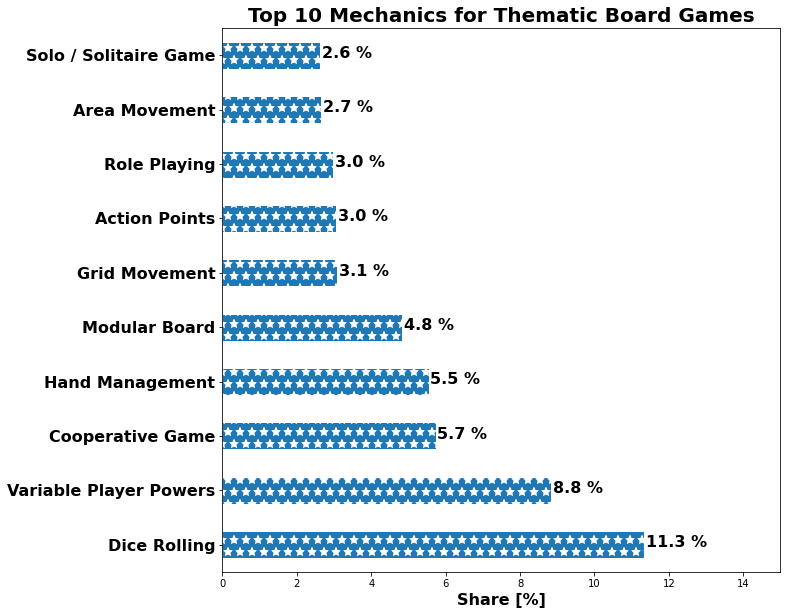

In [255]:
# Top 10 mechanics for thematic board game category
plot_top_10_hbar(board_game_Mech_vs_Catg_df, 'Mechanics', 'Thematic')
sorted_thematic_df = board_game_Mech_vs_Catg_df.nlargest(10, 'Thematic')

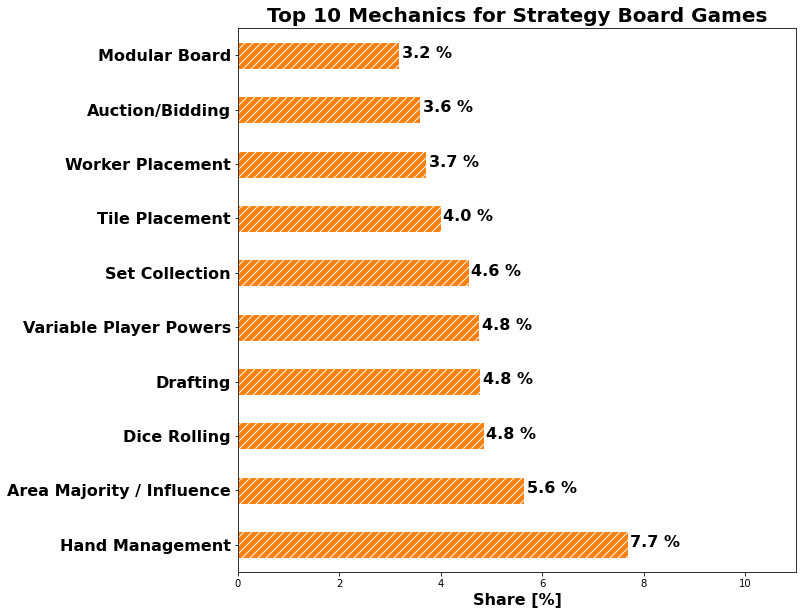

In [256]:
# Top 10 mechanics for strategy board game category
plot_top_10_hbar(board_game_Mech_vs_Catg_df, 'Mechanics', 'Strategy', plt_hatch = "///", plt_color = '#ff7f0e')
sorted_strategy_df = board_game_Mech_vs_Catg_df.nlargest(10, 'Strategy')

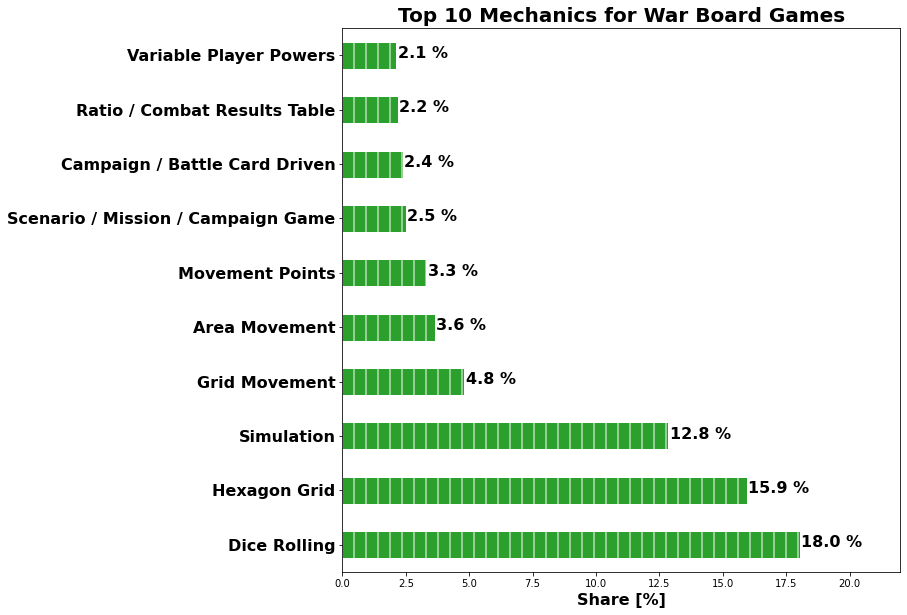

In [257]:
# Top 10 mechanics for war board game category
plot_top_10_hbar(board_game_Mech_vs_Catg_df, 'Mechanics', 'War', plt_hatch = "|", plt_color = '#2ca02c')
sorted_war_df = board_game_Mech_vs_Catg_df.nlargest(10, 'War')

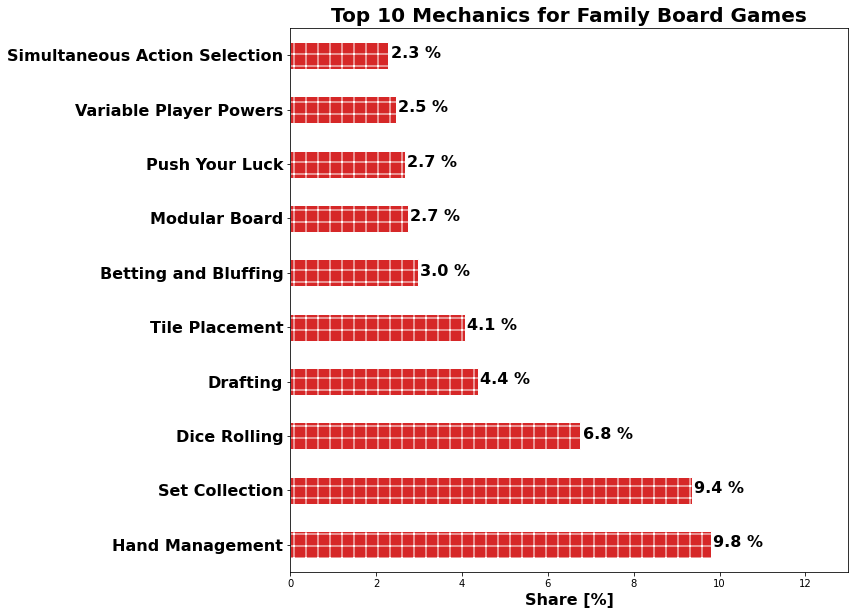

In [258]:
# Top 10 mechanics for family board game category
plot_top_10_hbar(board_game_Mech_vs_Catg_df, 'Mechanics', 'Family', plt_hatch = "+", plt_color = '#d62728')
sorted_family_df = board_game_Mech_vs_Catg_df.nlargest(10, 'Family')

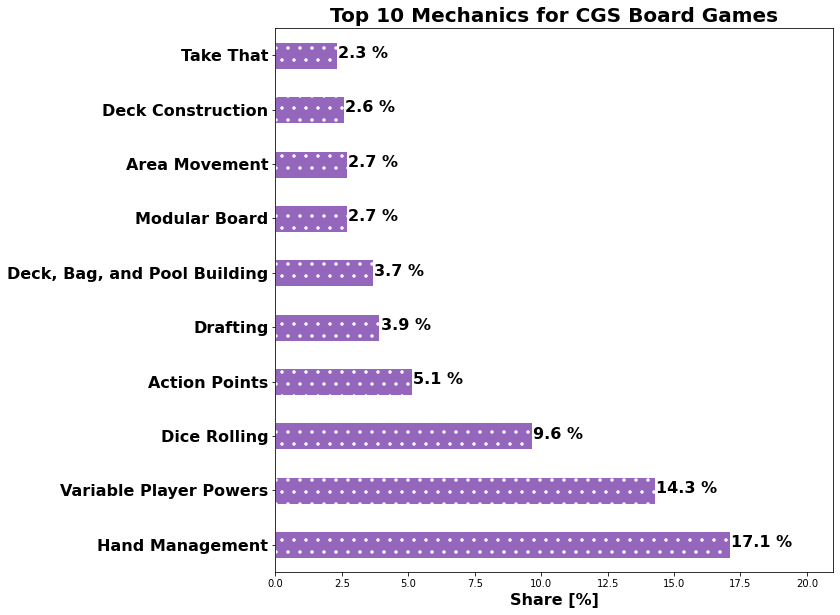

In [259]:
# Top 10 mechanics for CSG board game category
plot_top_10_hbar(board_game_Mech_vs_Catg_df, 'Mechanics', 'CGS', plt_hatch = ".", plt_color = '#9467bd')
sorted_cgs_df = board_game_Mech_vs_Catg_df.nlargest(10, 'CGS')

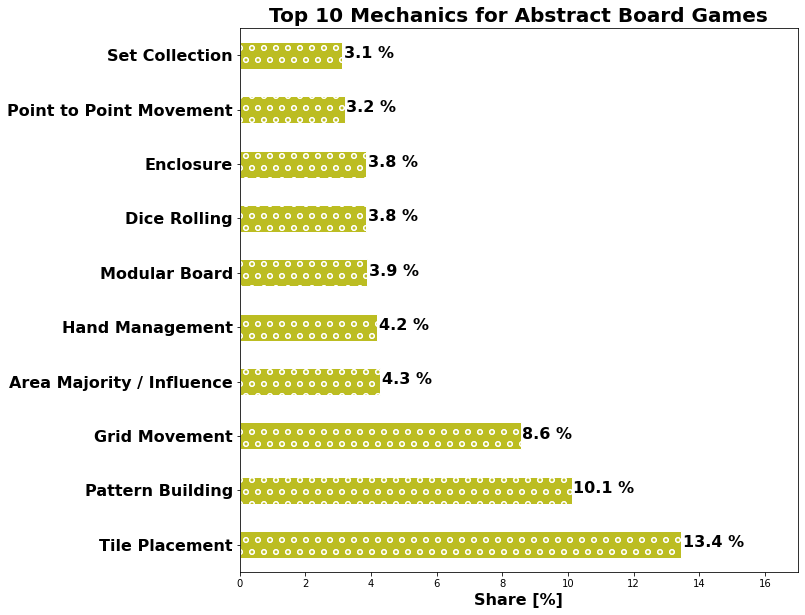

In [260]:
# Top 10 mechanics for Abstract board game category
plot_top_10_hbar(board_game_Mech_vs_Catg_df, 'Mechanics', 'Abstract', plt_hatch = "o", plt_color = '#bcbd22')
sorted_abstract_df = board_game_Mech_vs_Catg_df.nlargest(10, 'Abstract')

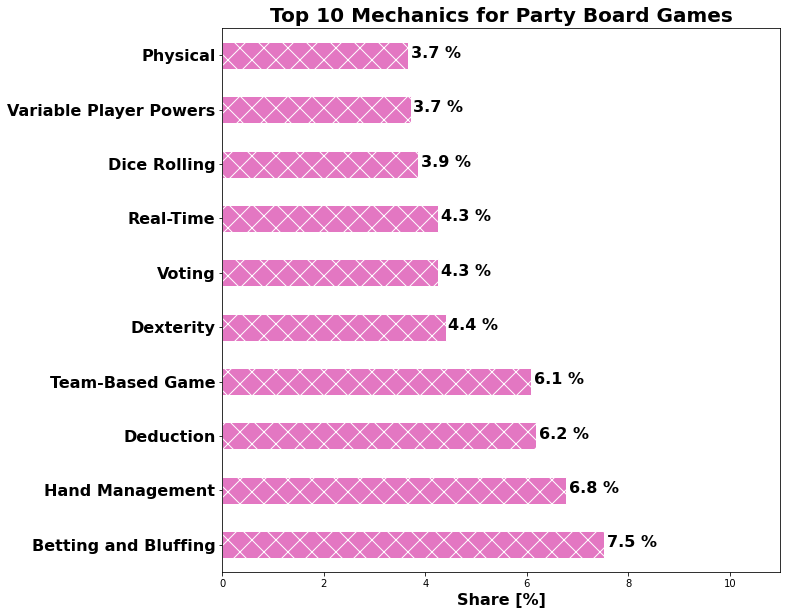

In [261]:
# Top 10 mechanics for Party board game category
plot_top_10_hbar(board_game_Mech_vs_Catg_df, 'Mechanics', 'Party', plt_hatch = "x", plt_color = '#e377c2')
sorted_party_df = board_game_Mech_vs_Catg_df.nlargest(10, 'Party')

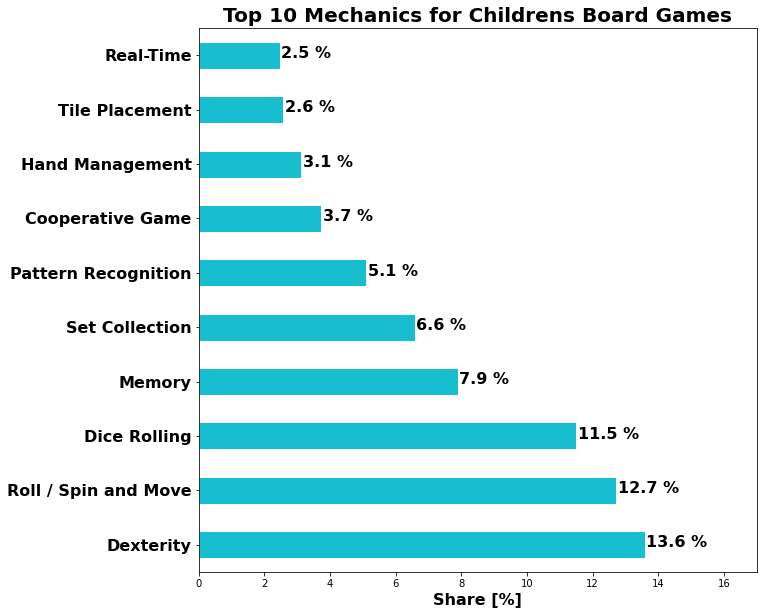

In [262]:
# Top 10 mechanics for Childrens board game category
plot_top_10_hbar(board_game_Mech_vs_Catg_df, 'Mechanics', 'Childrens', plt_hatch = "", plt_color = '#17becf')
sorted_childrens_df = board_game_Mech_vs_Catg_df.nlargest(10, 'Childrens')

In [263]:
# Get the top 10 list and convert to list for each board game category
sorted_thematic_list = sorted_thematic_df.index[:10].tolist()
sorted_strategy_list = sorted_strategy_df.index[:10].tolist()
sorted_war_list = sorted_war_df.index[:10].tolist()
sorted_family_list = sorted_family_df.index[:10].tolist()
sorted_cgs_list = sorted_cgs_df.index[:10].tolist()
sorted_abstract_list = sorted_abstract_df.index[:10].tolist()
sorted_party_list = sorted_party_df.index[:10].tolist()
sorted_childrens_list = sorted_childrens_df.index[:10].tolist()

# Append to the mechanic list
mechanic_list = []
mechanic_list.extend(sorted_thematic_list)
mechanic_list.extend(sorted_strategy_list)
mechanic_list.extend(sorted_war_list)
mechanic_list.extend(sorted_family_list)
mechanic_list.extend(sorted_cgs_list)
mechanic_list.extend(sorted_abstract_list)
mechanic_list.extend(sorted_party_list)
mechanic_list.extend(sorted_childrens_list)

# Display which mechanics appear the most
print(Counter(mechanic_list))

Counter({'Dice Rolling': 8, 'Hand Management': 7, 'Variable Player Powers': 6, 'Modular Board': 5, 'Set Collection': 4, 'Tile Placement': 4, 'Grid Movement': 3, 'Area Movement': 3, 'Drafting': 3, 'Cooperative Game': 2, 'Action Points': 2, 'Area Majority / Influence': 2, 'Betting and Bluffing': 2, 'Dexterity': 2, 'Real-Time': 2, 'Role Playing': 1, 'Solo / Solitaire Game': 1, 'Worker Placement': 1, 'Auction/Bidding': 1, 'Hexagon Grid': 1, 'Simulation': 1, 'Movement Points': 1, 'Scenario / Mission / Campaign Game': 1, 'Campaign / Battle Card Driven': 1, 'Ratio / Combat Results Table': 1, 'Push Your Luck': 1, 'Simultaneous Action Selection': 1, 'Deck, Bag, and Pool Building': 1, 'Deck Construction': 1, 'Take That': 1, 'Pattern Building': 1, 'Enclosure': 1, 'Point to Point Movement': 1, 'Deduction': 1, 'Team-Based Game': 1, 'Voting': 1, 'Physical': 1, 'Roll / Spin and Move': 1, 'Memory': 1, 'Pattern Recognition': 1})


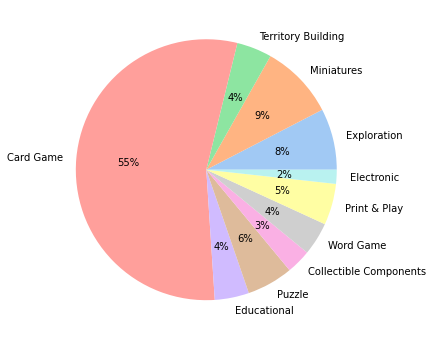

In [264]:
# subcategories
summed = subcategories_df.sum(axis = 0, skipna = True)  # sum all the categories
summed = summed.drop(labels = ["BGGId"])  # drop the bgg id sum
summeddf = pd.DataFrame(summed, columns=["Count"])  # convert to dataframe


data = summeddf["Count"].tolist()  # extract list of data(count of each category)
label= summeddf.index.tolist()  # extract list of category

colors = sns.color_palette('pastel')[0:len(label)]
plt.pie(data, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

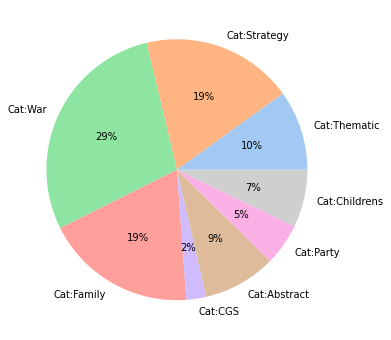

In [265]:
# categories
dfcat = games_df[["Cat:Thematic","Cat:Strategy","Cat:War","Cat:Family","Cat:CGS","Cat:Abstract","Cat:Party","Cat:Childrens"]]
summed = dfcat.sum(axis = 0, skipna = True)  # sum all the categories
summeddf = pd.DataFrame(summed, columns=["Count"])  # convert to dataframe

data = summeddf["Count"].tolist()  # extract list of data(count of each category)
label= summeddf.index.tolist()  # extract list of category

colors = sns.color_palette('pastel')[0:len(label)]
plt.pie(data, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

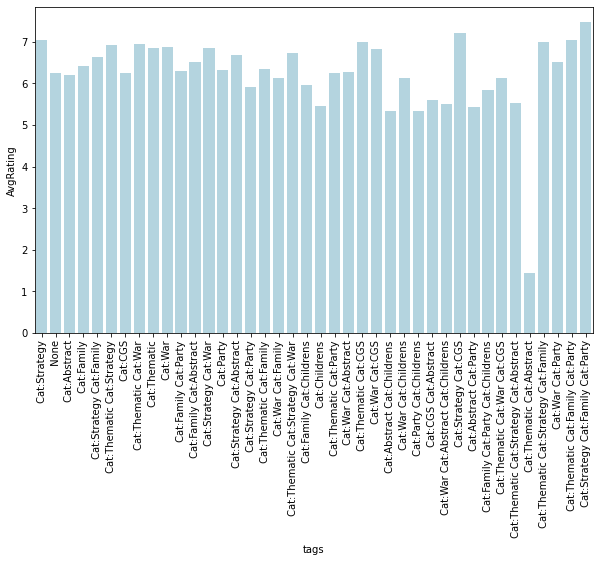

In [266]:
# mean of average rating across different categories
games_df["tags"] = ''

list = ["Cat:Thematic","Cat:Strategy","Cat:War","Cat:Family","Cat:CGS","Cat:Abstract","Cat:Party","Cat:Childrens"]
for col_name in list:
    games_df.loc[games_df[col_name] == 1, 'tags'] = games_df['tags'] + ' ' + col_name  # get a column with the categories

list2 = games_df['tags'].tolist()
for i in range(0,len(list2)):
    if list2[i] == '':
        list2[i] = ' None'  # for all the none types give a name none

games_df['tags'] = list2    
    
dfnew = games_df[["AvgRating","tags"]]
dfnew.groupby('tags').mean()  # get the mean of the average ratings of games of each category

fig = sns.barplot(x="tags",y="AvgRating",data=dfnew, color="lightblue",ci=None)
plt.xticks(rotation=90)
plt.show()

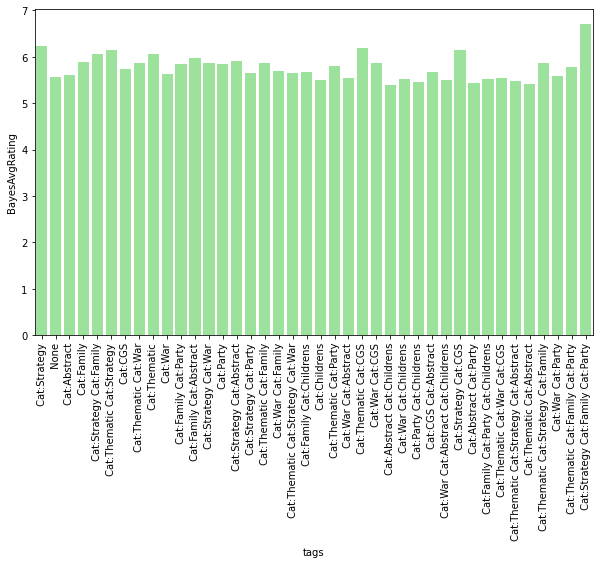

In [267]:
# mean of bayes rating across different categories
games_df["tags"] = ''

list = ["Cat:Thematic","Cat:Strategy","Cat:War","Cat:Family","Cat:CGS","Cat:Abstract","Cat:Party","Cat:Childrens"]
for col_name in list:
    games_df.loc[games_df[col_name] == 1, 'tags'] = games_df['tags'] + ' ' + col_name  # get a column with the categories

list2 = games_df['tags'].tolist()
for i in range(0,len(list2)):
    if list2[i] == '':
        list2[i] = ' None'  # for all the none types give a name none

games_df['tags'] = list2    
    
dfnew = games_df[["BayesAvgRating","tags"]]
dfnew.groupby('tags').mean()  # get the mean of the average ratings of games of each category

fig = sns.barplot(x="tags",y="BayesAvgRating",data=dfnew, color="lightgreen",ci=None)
plt.xticks(rotation=90)
plt.show()

## Publisher
To be able to sales as many copies of games we must find a will publisher with a track record of publishing games similar games. 

In [268]:
#join tables
combined_df = games_df.join(publisher_df.set_index('BGGId'))

In [269]:
#filter game by ranking
filter_rating =  combined_df['AvgRating'] > 7
filter_games_rating = combined_df[filter_rating]

In [270]:
#filter game by ranking
filter_rating_weight = filter_games_rating['GameWeight'] > 2
filter_games_rating_weight = filter_games_rating[filter_rating_weight]

In [271]:
sum_publish = pd.DataFrame(filter_games_rating_weight.loc[:, "Moskito Spiele" :"Hidden Industries GmbH"].sum(axis=0))
sum_publish.columns=["Count"]
sum_publish = sum_publish.sort_values(by=['Count']) # sort by year

In [272]:
fig = px.bar(sum_publish['Count'].nlargest(10),
             labels={
                     "value": "Number of Published Games",
                     "index": "Publisher",
                 },title="Desired Publishers")

fig.show()